# Three-Layer Neural Network for MNIST Classification

This notebook implements a **three-layer neural network** using the **TensorFlow** library (without Keras) to classify handwritten digits from the **MNIST dataset**.

## **Approach**
- **Feedforward Propagation**: Computes activations using weights and biases.
- **Backpropagation**: Updates weights using gradients to minimize classification error.

## **Network Architecture**
1. **Input Layer**: 784 neurons (since images are 28x28 pixels)
2. **Hidden Layer 1**: 128 neurons (with ReLU activation)
3. **Hidden Layer 2**: 64 neurons (with ReLU activation)
4. **Output Layer**: 10 neurons (for 10 digit classes, using softmax activation)

## **Training Details**
- **Loss Function**: Cross-Entropy Loss
- **Optimization Algorithm**: Gradient Descent Optimizer
- **Evaluation**: Accuracy calculation on test data


Epoch 1, Loss: 1.3166
Epoch 2, Loss: 0.4029
Epoch 3, Loss: 0.2818
Epoch 4, Loss: 0.2174
Epoch 5, Loss: 0.1749
Epoch 6, Loss: 0.1442
Epoch 7, Loss: 0.1213
Epoch 8, Loss: 0.1037
Epoch 9, Loss: 0.0894
Epoch 10, Loss: 0.0773
Epoch 11, Loss: 0.0671
Epoch 12, Loss: 0.0584
Epoch 13, Loss: 0.0509
Epoch 14, Loss: 0.0443
Epoch 15, Loss: 0.0386
Epoch 16, Loss: 0.0336
Epoch 17, Loss: 0.0291
Epoch 18, Loss: 0.0251
Epoch 19, Loss: 0.0216
Epoch 20, Loss: 0.0186
Test Accuracy: 95.86%


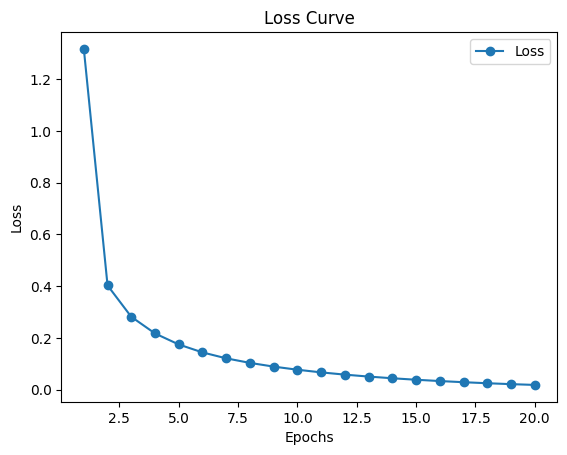

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize input data
x_train, x_test = tf.cast(x_train, tf.float32) / 255.0, tf.cast(x_test, tf.float32) / 255.0

# Flatten images
x_train, x_test = tf.reshape(x_train, [-1, 28 * 28]), tf.reshape(x_test, [-1, 28 * 28])

# Define model parameters
hidden_units = 128
output_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([28 * 28, hidden_units]))
b1 = tf.Variable(tf.zeros([hidden_units]))
W2 = tf.Variable(tf.random.normal([hidden_units, output_size]))
b2 = tf.Variable(tf.zeros([output_size]))

# Define forward pass
def forward_pass(x):
    hidden_layer = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
    return tf.nn.softmax(tf.matmul(hidden_layer, W2) + b2)  # Using softmax for classification

# Define loss function and optimizer
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.losses.sparse_categorical_crossentropy(y_true, y_pred))

optimizer = tf.optimizers.Adam()

# Training loop
epochs = 20
batch_size = 32
loss_history = []
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

for epoch in range(epochs):
    epoch_loss = 0
    for x_batch, y_batch in dataset.as_numpy_iterator():
        with tf.GradientTape() as tape:
            y_pred = forward_pass(x_batch)
            loss = compute_loss(y_batch, y_pred)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        epoch_loss += loss.numpy()
    
    loss_history.append(epoch_loss / len(dataset))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(dataset):.4f}")

# Evaluate the model
accuracy = tf.reduce_mean(tf.cast(tf.argmax(forward_pass(x_test), axis=1) == y_test, tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

# Plot loss curve
plt.plot(range(1, epochs + 1), loss_history, marker='o', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()